In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("retail_sales_dataset.csv")

In [8]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.shape

(1000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [12]:
sales_by_gender = df.groupby('Gender')['Total Amount'].sum().reset_index()


In [27]:
sales_by_product_category = df.groupby('Product Category')['Total Amount'].sum()

In [28]:
sales_by_product_category

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

In [13]:
sales_by_gender

,Gender,Total Amount
0,Female,232840
1,Male,223160


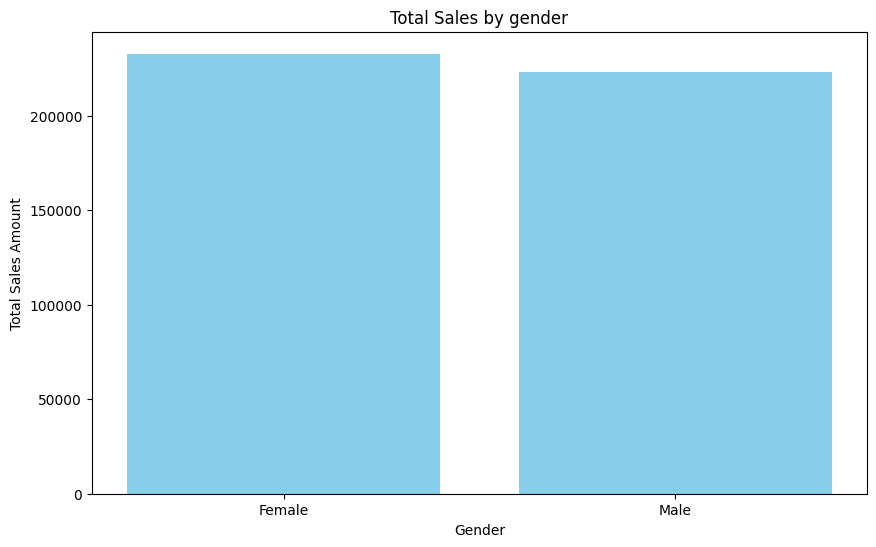

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_gender['Gender'], sales_by_gender['Total Amount'], color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales by gender')
plt.show()

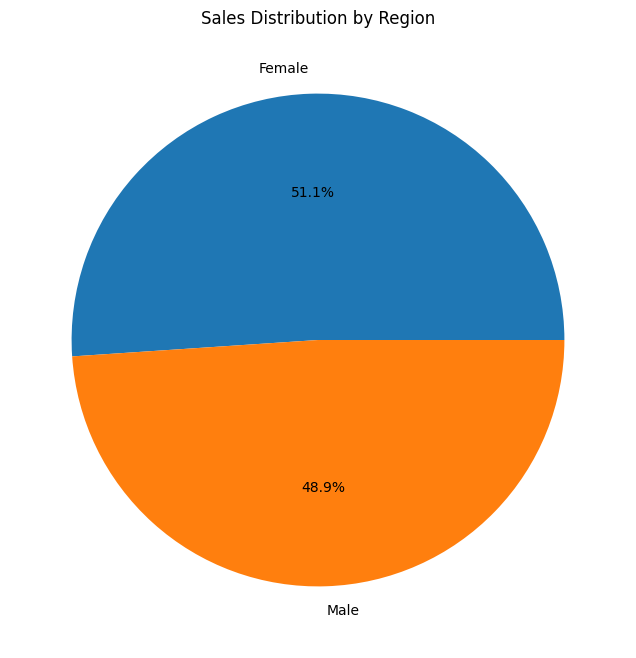

In [22]:
# Optional: Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_gender['Total Amount'], labels=sales_by_gender['Gender'], autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.show()

In [36]:
top_gender = sales_by_gender.sort_values(by='Total Amount', ascending=False)
print(top_gender)

   Gender  Total Amount
0  Female        232840
1    Male        223160


In [43]:
top_product_category = sales_by_product_category.sort_values(ascending=False)
print(top_product_category)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [50]:
sales_by_age_category = df.groupby(['Age', 'Product Category'])['Total Amount'].sum().unstack().fillna(0)

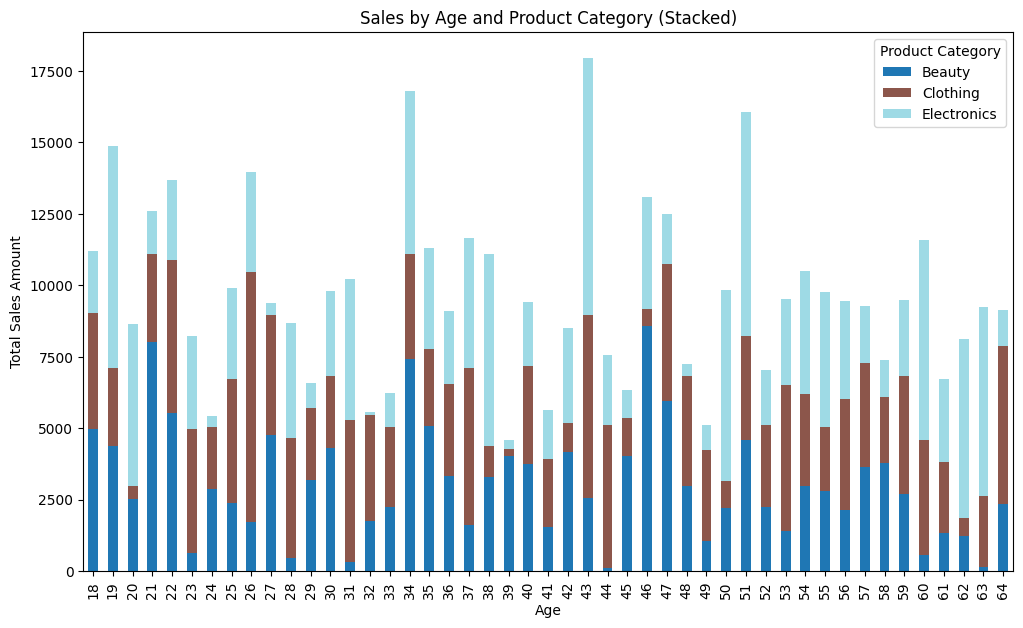

In [51]:
sales_by_age_category.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.xlabel('Age')
plt.ylabel('Total Sales Amount')
plt.title('Sales by Age and Product Category (Stacked)')
plt.legend(title='Product Category')
plt.show()